#  Тестовое задание 

# Задача проекта
Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. 
Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. 
Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.


In [1]:
# Импортируем нужные библиотеки
from pathlib import Path
import pandas as pd
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt

## Загрузка данных

In [2]:
# подготовим абсолютный путь до папки с данными
path = os.path.expanduser('/home/sgm/test_tasks/Trikolor/')

# загрузка contract 
contract = pd.read_csv(path + 'contract.csv')

# загрузка contract 
internet = pd.read_csv(path + 'internet.csv')

# загрузка contract 
personal = pd.read_csv(path + 'personal.csv')

# загрузка contract 
phone = pd.read_csv(path + 'phone.csv')


## Анализ данных contract
отобразим загруженные данные
размер выборки 7043 Х 8
дубликатов нет
пропущенных значений нет


In [3]:
print(f'размер выборки contract: {contract.shape}')
print(f'кол-во дубликатов в contract: {contract.duplicated().sum()}') 
print('пропущенные значения contract:', ((contract.isna().sum()/len(contract)) * 100).sort_values())
contract.head(3)

размер выборки contract: (7043, 8)
кол-во дубликатов в contract: 0
пропущенные значения contract: customerID          0.0
BeginDate           0.0
EndDate             0.0
Type                0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
dtype: float64


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15


## Анализ данных internet
отобразим загруженные данные
размер выборки 5517 Х 8
дубликатов нет
пропущенных значений нет


In [4]:
print(f'размер выборки internet: {internet.shape}')
print(f'кол-во дубликатов в internet: {internet.duplicated().sum()}') 
print('пропущенные значения internet:', ((internet.isna().sum()/len(internet)) * 100).sort_values())
internet.head(3)

размер выборки internet: (5517, 8)
кол-во дубликатов в internet: 0
пропущенные значения internet: customerID          0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
dtype: float64


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No


## Анализ данных personal
отобразим загруженные данные
размер выборки 7043 Х 8
дубликатов нет
пропущенных значений нет

In [5]:
print(f'размер выборки personal: {personal.shape}')
print(f'кол-во дубликатов в personal: {personal.duplicated().sum()}') 
print('пропущенные значения personal:', ((personal.isna().sum()/len(personal)) * 100).sort_values())
personal.head(3)

размер выборки personal: (7043, 5)
кол-во дубликатов в personal: 0
пропущенные значения personal: customerID       0.0
gender           0.0
SeniorCitizen    0.0
Partner          0.0
Dependents       0.0
dtype: float64


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No


## Анализ данных phone
отобразим загруженные данные
размер выборки 6361 Х 2
дубликатов нет
пропущенных значений нет

In [6]:
print(f'размер выборки phone: {phone.shape}')
print(f'кол-во дубликатов в phone: {phone.duplicated().sum()}') 
print('пропущенные значения phone:', ((phone.isna().sum()/len(phone)) * 100).sort_values())
phone.head(3)

размер выборки phone: (6361, 2)
кол-во дубликатов в phone: 0
пропущенные значения phone: customerID       0.0
MultipleLines    0.0
dtype: float64


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No


# Объединим все файлы в один для дальнейшего моделирования

In [7]:
df_merged = pd.merge(
    contract, internet,
    left_on='customerID',
    right_on='customerID',
    how='left'
)

df_merged2 = pd.merge(
    df_merged, personal,
    left_on='customerID',
    right_on='customerID',
    how='left'
)

df_merged3 = pd.merge(
    df_merged2, phone,
    left_on='customerID',
    right_on='customerID',
    how='left'
)

df_merged3.head(3)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No


In [8]:
# Из 7043 пользователей , 5174 продолжают оставать пользователями, те. те кто ушел - это 1869 человек. 
# Будем прогнозировать из каких факторов они уходят. 

df_merged3['EndDate'].value_counts()

No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: EndDate, dtype: int64

## Что делать с пропусками
в наших данных есть 20% пропущенных значений
анализ показывает, что это бинарные столбцы (значения yes/no, Fiber/DSL) и распределение плюс/минус одинаковое, те мы не можем заменить пропуски на частовстречающееся, иначе мы сместим имеющиееся распределение. 
Также не стоит наверное рандомно распределять в пропусках бинарные значения, тк мы можем исказить картину. 
20% конечно приличный объем данных для удаления, но принимаю решение удалить эти строки, чтобы не вносить неправду в текущую модель.

In [9]:
print(df_merged3['MultipleLines'].value_counts())
print(df_merged3['StreamingTV'].value_counts())
print(df_merged3['StreamingMovies'].value_counts())
print(df_merged3['DeviceProtection'].value_counts())
print(df_merged3['OnlineBackup'].value_counts())
print(df_merged3['InternetService'].value_counts())
print(df_merged3['TechSupport'].value_counts())
print(df_merged3['OnlineSecurity'].value_counts())

No     3390
Yes    2971
Name: MultipleLines, dtype: int64
No     2810
Yes    2707
Name: StreamingTV, dtype: int64
No     2785
Yes    2732
Name: StreamingMovies, dtype: int64
No     3095
Yes    2422
Name: DeviceProtection, dtype: int64
No     3088
Yes    2429
Name: OnlineBackup, dtype: int64
Fiber optic    3096
DSL            2421
Name: InternetService, dtype: int64
No     3473
Yes    2044
Name: TechSupport, dtype: int64
No     3498
Yes    2019
Name: OnlineSecurity, dtype: int64


## Удалим строки с пропущенными значениями

In [10]:
for col in df_merged3.columns:
    pct_missing = np.mean(df_merged3[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

customerID - 0%
BeginDate - 0%
EndDate - 0%
Type - 0%
PaperlessBilling - 0%
PaymentMethod - 0%
MonthlyCharges - 0%
TotalCharges - 0%
InternetService - 22%
OnlineSecurity - 22%
OnlineBackup - 22%
DeviceProtection - 22%
TechSupport - 22%
StreamingTV - 22%
StreamingMovies - 22%
gender - 0%
SeniorCitizen - 0%
Partner - 0%
Dependents - 0%
MultipleLines - 10%


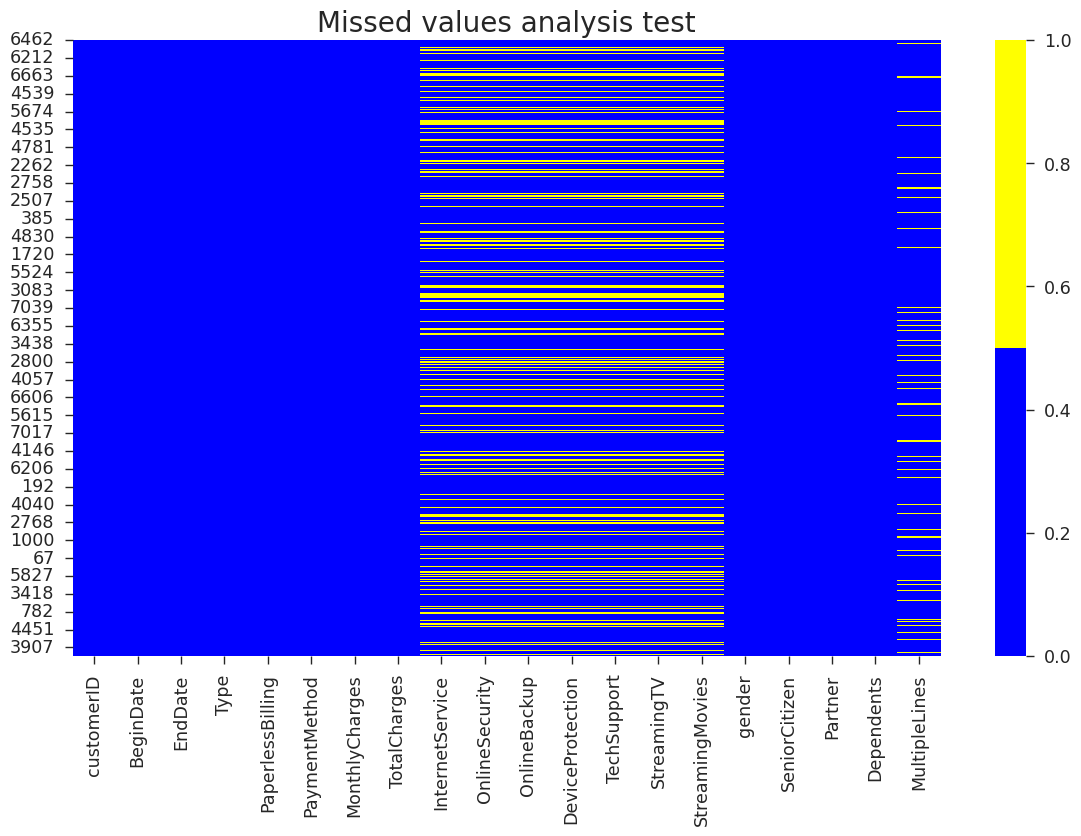

In [11]:
from jupyterthemes import jtplot
jtplot.style(context='notebook', ticks=True, grid=False)

plt.figure(figsize=(14, 8))
plt.title('Missed values analysis test', fontsize=20)
sns.heatmap(df_merged3.sample(2000).isnull(), cmap=sns.color_palette(['blue', 'yellow']))
plt.show()

In [12]:
print('размер до удаления', df_merged3.shape)
df=df_merged3.dropna() 
print('размер после удаления', df.shape)

размер до удаления (7043, 20)
размер после удаления (4835, 20)


## Изменим тип данных для дальнейшего моделирования
даты BeginDate EndDate(не поменять, тк есть значение no - где пользователи еще остаются клиентами)
TotalCharges - количественный

In [13]:
df['BeginDate'] = pd.to_datetime(df.BeginDate, utc=True)

/tmp/ipykernel_24139/224277735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BeginDate'] = pd.to_datetime(df.BeginDate, utc=True)


In [35]:
# в столбце TotalCharges есть пропущенные значения, не идентифицируются как NaN 
# с помощью метода isnull ячейки не идентифицируются
# хотя если смотреть на данные с помощью df.iloc[660:669], будут видны пропуски в данных, заменим их на Nan и удалим
df[df['TotalCharges'].isnull()]
df.reset_index(drop= True , inplace= True )

In [37]:
# ошибка в строке 457, 662, 663, 4565, 4566, 4567, 4568,  4569, 4570, 4621 пропуск значения. удалим эту строку
df = df.drop (index=[457, 662, 663, 4559, 4563, 4564, 4565, 4566, 4567, 4568,  4569, 4570, 4573, 4593, 4621]) 

In [38]:
# переведем колонку в числовой формат
df['TotalCharges'] = pd.to_numeric(df.TotalCharges)

In [77]:
#заменим колонку EndDate, уберем значения nan, чтобы она стала по типу временем 

df['EndDate_2']=df['EndDate'].replace('No', 0)
df[['EndDate', 'EndDate_2']]

In [80]:
df['EndDate_2'] = pd.to_datetime(df.EndDate_2, utc=True)

## Визуал
посмотрим числовые столбцы
MonthlyCharges видимо распределение нормальное. 

Text(0.5, 1.0, 'MonthlyCharges')

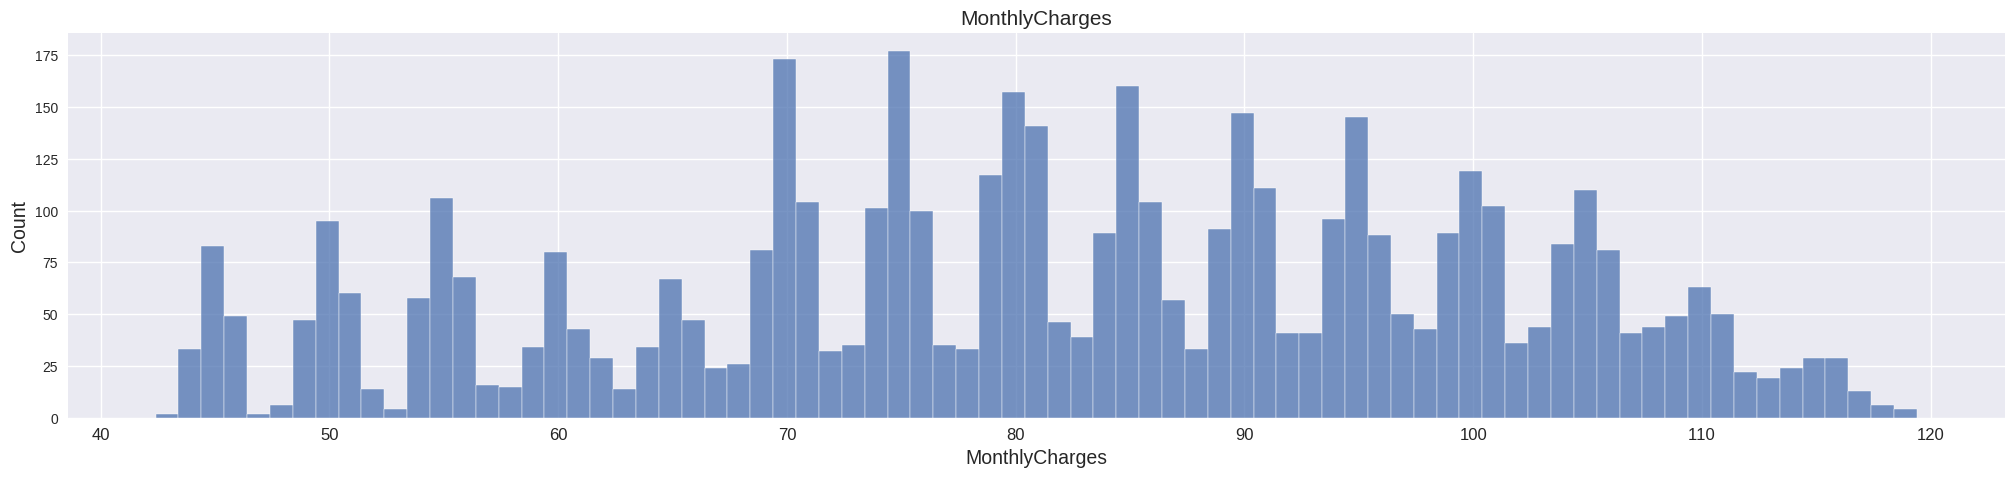

In [83]:
# Анализ числовых колонок
plt.figure(figsize=(25, 5))
sns.histplot(data=df, x='MonthlyCharges', discrete=True)
plt.title('MonthlyCharges')

Text(0.5, 1.0, 'TotalCharges')

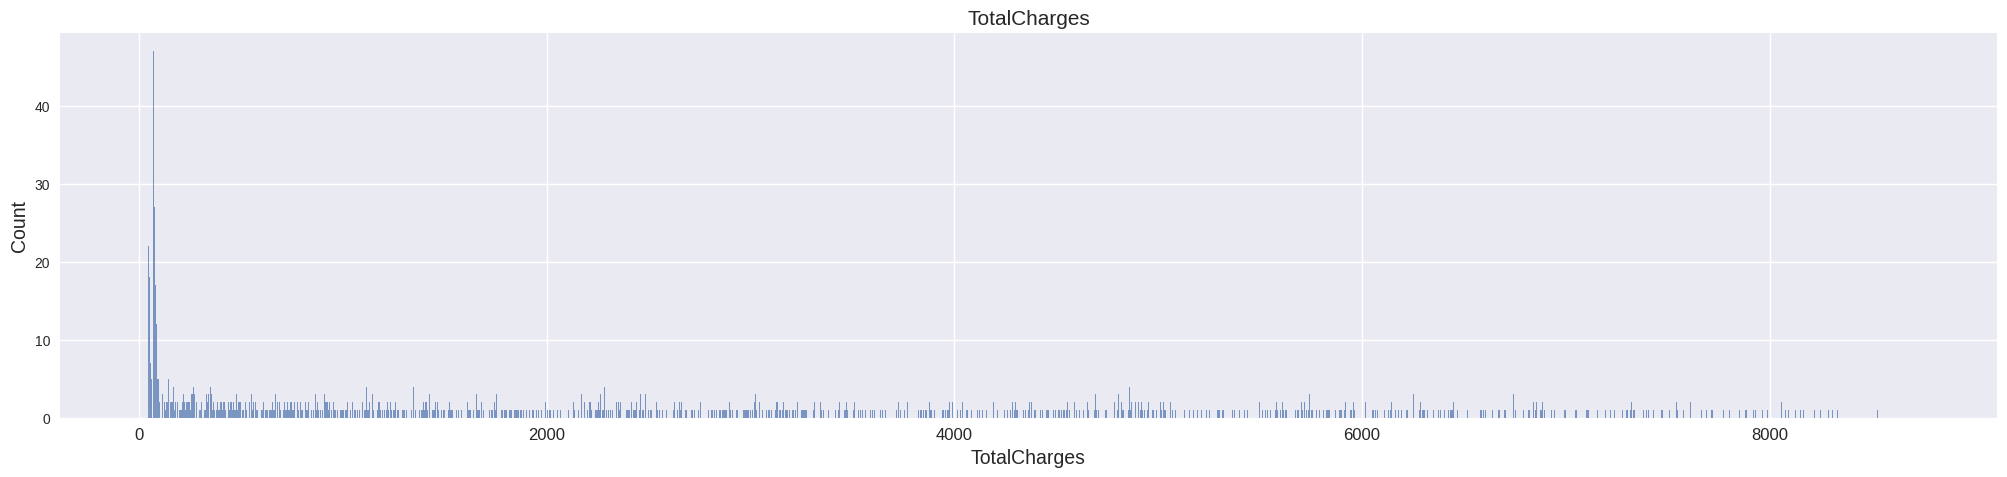

In [84]:
# Анализ числовых колонок
plt.figure(figsize=(25, 5))
sns.histplot(data=df, x='TotalCharges', discrete=True)
plt.title('TotalCharges')

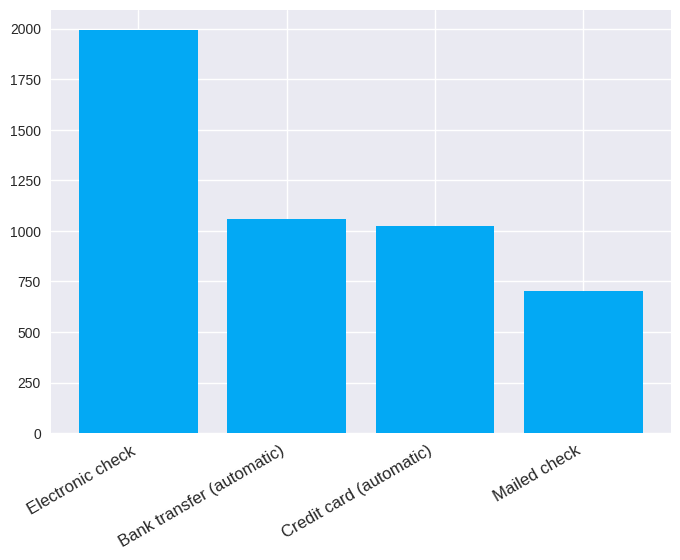

In [85]:
type_counts = df['PaymentMethod'].value_counts()

plt.style.use('seaborn') # Смена стиля всех графиков matplotlib

params = {
          'axes.titlesize': 15,   # Размер шрифта главной подписи
          'xtick.labelsize': 12,  # Размер шрифта подписей тикетов оси X
          'axes.labelsize': 14    # Размер шрифта подписей осей
          }
plt.rcParams.update(params) # Фиксация параметров

plt.xticks(rotation=30, ha = 'right') # Поворот на 30 градусов подписей оси X и выравнивание по правому краю

plt.bar(type_counts.index, type_counts.values, color='#03A9F4') 
plt.show()

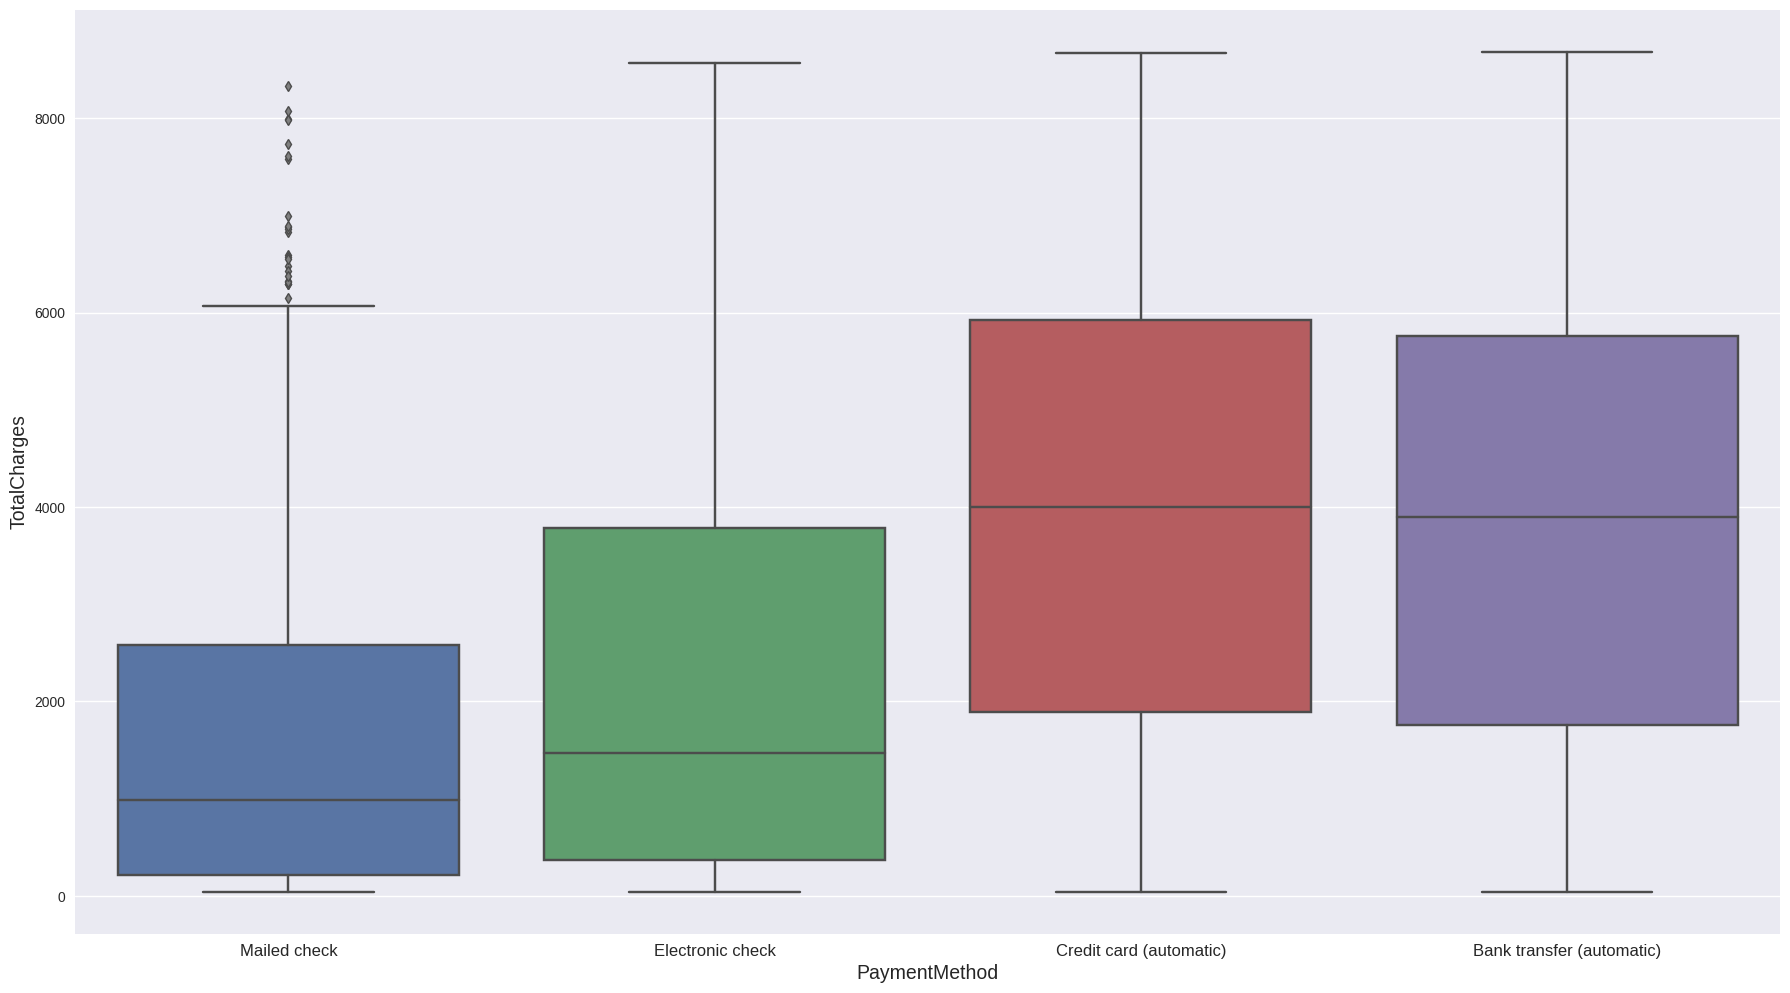

In [86]:
plt.figure(figsize=(22, 12))
sns.boxplot(x=df['PaymentMethod'], y=df['TotalCharges'], flierprops=dict(markerfacecolor="#808080"))
plt.show()

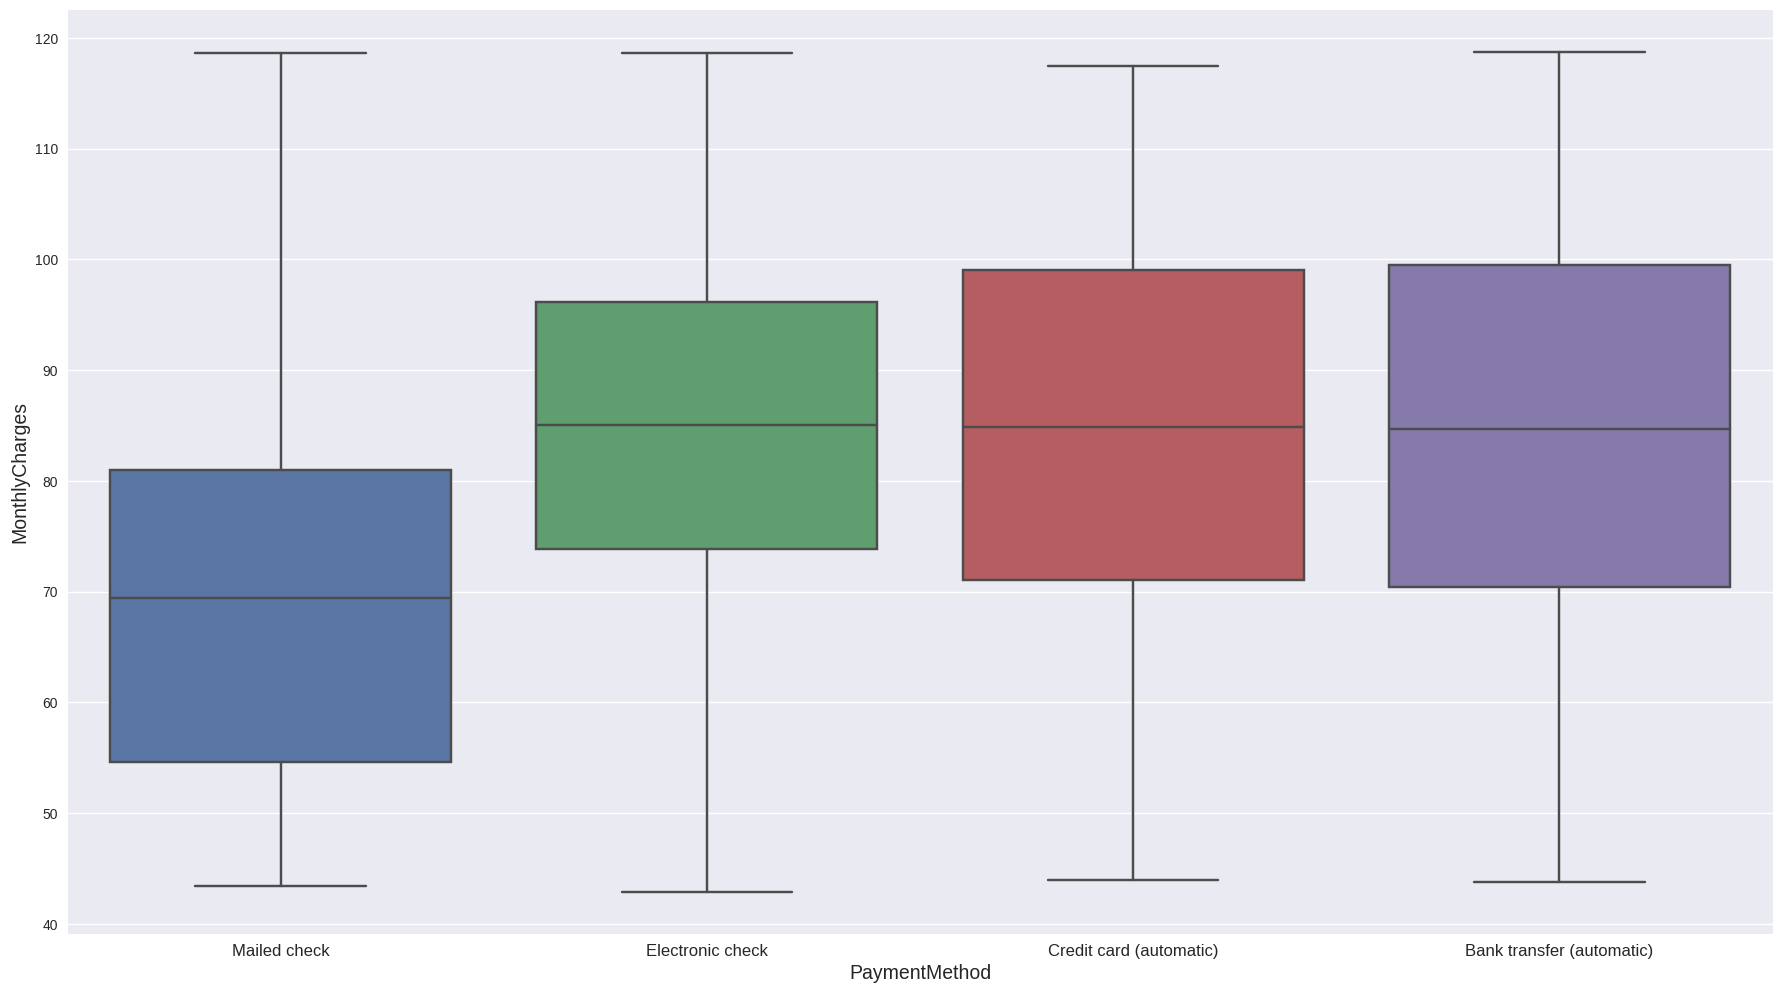

In [87]:
plt.figure(figsize=(22, 12))
sns.boxplot(x=df['PaymentMethod'], y=df['MonthlyCharges'], flierprops=dict(markerfacecolor="#808080"))
plt.show()

## 

In [112]:
#создадим функцию для создания колонки 'churn' - целевая колонка, которую необходимо спрогнозировать. 
def f(row):
 if row['EndDate'] == 'No':
     val = 'no'
 else :
     val = 'yes'
 return val
#создадим новую колонку 'churn' с помощью функции выше.
df['churn'] = df.apply (f, axis=1)


In [113]:
# 0 нет, дубликатов нет. Можно переходить к генерации фич и моделированию.
print(df.isna().sum())
df[df.duplicated()]

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
churn               0
EndDate_2           0
dtype: int64


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,churn,EndDate_2


In [172]:
df['churn'].value_counts()

0    3210
1    1571
Name: churn, dtype: int64

In [171]:
# заменим в целевом признаке значения на no-0 (клиент остался) и yes-1 (клиент покинул)
df['churn'] = np.where((df.churn == 'no'), 0, 1)

# Генерация фич

In [173]:
df[['SeniorCitizen']]=df[['SeniorCitizen']].astype(object)

## cоздадим логарифм, квадратный корень и корень из числовых значений

In [174]:
def sqr_sqrt_log_features_transform(df: pd.DataFrame,
                                    sqr_miss: list=None,
                                    sqrt_miss: list=None,
                                    log_miss: list=None,
                                   ) -> pd.DataFrame:
    """
    Function transforms dataset adding squares, square roots and logarithm of numerical features
    
    :param df:  input data frame
    :sqr_miss:  columns, that should be missed for square feature generation
    :sqrt_miss: columns, that should be missed for square root feature generation
    :log_miss:  columns, that should be missed for logarithm feature generation
    
    :return:    dataframe with added features
    """
    
    df2 =  df.copy()
    numeric_cols = df2.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if ~np.isin(col, sqrt_miss):
            df2[f'{col}_sqr'] = np.square(df2[col])
        if ~np.isin(col, sqrt_miss):
            df2[f'{col}_sqrt'] = np.sqrt(df2[col])
        if ~np.isin(col, log_miss):
            df2[f'{col}_log'] = np.log(df2[col] + 0.01)    
    return df2

In [175]:
df2 = sqr_sqrt_log_features_transform(df, 
                                       sqr_miss=['churn'],
                                       sqrt_miss=['churn'],
                                       log_miss=['churn'],
                                     )
df2.shape

(4781, 28)

## cоздадим фичи из категориальных данных через OHE кодирование

In [183]:
df2['Type'].value_counts()
df2['PaperlessBilling'].value_counts()
df2['PaymentMethod'].value_counts()
df2['InternetService'].value_counts()
df2['OnlineSecurity'].value_counts()
df2['OnlineBackup'].value_counts()
df2['DeviceProtection'].value_counts()

No     2689
Yes    2092
Name: DeviceProtection, dtype: int64

In [184]:
#выберем данные для OHE кодирования
for_ohe=df2[['Type', 'PaperlessBilling', 'PaymentMethod', 'InternetService', 
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
            'StreamingTV', 'StreamingMovies', 'gender', 'SeniorCitizen', 
           'Partner', 'Dependents', 'MultipleLines']]

In [185]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
ohe.fit(for_ohe)
ohe.get_feature_names()
ohe_categor = ohe.transform(for_ohe)
df2[ohe.get_feature_names()] = ohe_categor
df2.shape

/home/sgm/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/sgm/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(4781, 61)

In [186]:
#удалим категориальные колонки
df2 = df2.drop(['Type', 'PaperlessBilling', 'PaymentMethod', 'InternetService', 
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
            'StreamingTV', 'StreamingMovies', 'gender', 'SeniorCitizen', 
           'Partner', 'Dependents', 'MultipleLines'], axis=1)
df2.shape

(4781, 46)

In [187]:
#удалим колонки customerID
df2 = df2.drop(['customerID', 'EndDate'], axis=1)
df2.shape

(4781, 44)

In [188]:
# проверим на дубликаты, удалим их
df2[df2.duplicated()].shape

(2, 44)

In [189]:
df2 = df2.drop_duplicates()
df2[df2.duplicated()].shape

(0, 44)

## cоздадим фичи из колонок с датами

In [190]:
# в начале и окончании даты создадим новые признаки , такие как день, месяц и год начала или окончания 
# активности пользователя

#df2['BeginDate_day'] = df2['BeginDate'].dt.day
df2['BeginDate_month'] = df2['BeginDate'].dt.month
df2['BeginDate_year'] = df2['BeginDate'].dt.year

#df2['EndDate_day'] = df2['EndDate_2'].dt.day
df2['EndDate_month'] = df2['EndDate_2'].dt.month
df2['EndDate_year'] = df2['EndDate_2'].dt.year

In [191]:
# можно отфильтровать данные по пользователям которые ушли, всего 1569 пользователей. 
# собственно их и будем анализировать, почему и как ушли, при каких условиях
filter = df2['EndDate_year']>1970
df_filt = df2[filter]

df_filt.shape

(1569, 48)

In [192]:
df2['year_diff']=df2['EndDate_year']-df2['BeginDate_year']

In [194]:
# заменим все отрицательные значения
df2['year_diff'] = np.where((df2.year_diff < 0), -1, df2.year_diff)
df2.head(2)

,BeginDate,MonthlyCharges,TotalCharges,churn,EndDate_2,MonthlyCharges_sqr,MonthlyCharges_sqrt,MonthlyCharges_log,TotalCharges_sqr,TotalCharges_sqrt,...,x12_Yes,x13_No,x13_Yes,x14_No,x14_Yes,BeginDate_month,BeginDate_year,EndDate_month,EndDate_year,year_diff
0,2017-04-01 00:00:00+00:00,56.95,1889.50,0,1970-01-01 00:00:00+00:00,3243.3025,7.546522,4.042349,3.570210e+06,43.468379,...,0.0,1.0,0.0,1.0,0.0,4,2017,1,1970,-1
1,2019-10-01 00:00:00+00:00,53.85,108.15,1,2019-12-01 00:00:00+00:00,2899.8225,7.338256,3.986388,1.169642e+04,10.399519,...,0.0,1.0,0.0,1.0,0.0,10,2019,12,2019,0


In [195]:
df2['year_diff'].value_counts()

-1    3210
 0     580
 1     413
 2     204
 3     140
 4     113
 5      86
 6      33
Name: year_diff, dtype: int64

In [211]:
df2['BeginDate'] = pd.to_datetime(df2['BeginDate']).astype('int64')


In [213]:
#удалим дату, которая не будет уч-ть в моделировании
df2 = df2.drop(['EndDate_2', 'EndDate_year', 'EndDate_month'], axis=1)
df2.shape

(4779, 46)

# ВТОРАЯ ЧАСТЬ - МОДЕЛИРОВАНИЕ'

Data modelling Предсказание оттока клиентов. Определить пользователей, которые планируют уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.


# Моделирование

In [214]:
# импорт необходимых библиотек
!pip install xgboost 
!pip install lightgbm 
!pip install bayesian-optimization
!pip install feature-engine
!pip install bayesian-optimization
!pip install colorama



import scipy
import sys
from datetime import datetime
import warnings
from pathlib import Path
from typing import Union
from functools import partial
import time
import os
import warnings
warnings.filterwarnings('ignore')

# препроцессинг и метрики

from matplotlib import pyplot
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.model_selection import (
    train_test_split, GridSearchCV, StratifiedKFold)
from sklearn.metrics import (
    roc_auc_score, accuracy_score, confusion_matrix, precision_score, 
    recall_score, f1_score, make_scorer, roc_curve)
from sklearn.pipeline import Pipeline
from feature_engine.encoding import RareLabelEncoder, OneHotEncoder
from feature_engine.wrappers import SklearnTransformerWrapper
from feature_engine.outliers import Winsorizer
from feature_engine.selection import (
    DropDuplicateFeatures, DropConstantFeatures, 
    DropCorrelatedFeatures, DropFeatures)
from feature_engine.transformation import YeoJohnsonTransformer
from bayes_opt import BayesianOptimization

# модели
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, HistGradientBoostingClassifier)
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

## train-test split
Оценим базовую модель. Так как целевая переменная распределена не равномерно, то в качестве бейзлайна можно выбрать стратегию, которая для каждой сессии предсказывает значение 0.

In [ ]:
 6   MonthlyCharges_log            4779 non-null   float64
 7   TotalCharges_sqr              4779 non-null   float64
 8   TotalCharges_sqrt             4779 non-null   float64
 9   TotalCharges_log              4779 non-null   float64
 10  x0_Month-to-month             4779 non-null   float64
 11  x0_One year                   4779 non-null   float64
 12  x0_Two year                   4779 non-null   float64
 13  x1_No                         4779 non-null   float64
 14  x1_Yes                        4779 non-null   float64
 15  x2_Bank transfer (automatic)  4779 non-null   float64
 16  x2_Credit card (automatic)    4779 non-null   float64
 17  x2_Electronic check           4779 non-null   float64
 18  x2_Mailed check               4779 non-null   float64
 19  x3_DSL                        4779 non-null   float64
 20  x3_Fiber optic                4779 non-null   float64
 21  x4_No                         4779 non-null   float64
 22  x4_Yes                        4779 non-null   float64
 23  x5_No                         4779 non-null   float64
 24  x5_Yes                        4779 non-null   float64
 25  x6_No                         4779 non-null   float64
 26  x6_Yes                        4779 non-null   float64
 27  x7_No                         4779 non-null   float64
 28  x7_Yes                        4779 non-null   float64
 29  x8_No                         4779 non-null   float64
 30  x8_Yes                        4779 non-null   float64
 31  x9_No                         4779 non-null   float64
 32  x9_Yes                        4779 non-null   float64
 33  x10_Female                    4779 non-null   float64
 34  x10_Male                      4779 non-null   float64
 35  x11_0                         4779 non-null   float64
 36  x11_1                         4779 non-null   float64
 37  x12_No                        4779 non-null   float64
 38  x12_Yes                       4779 non-null   float64
 39  x13_No                        4779 non-null   float64
 40  x13_Yes                       4779 non-null   float64
 41  x14_No                        4779 non-null   float64
 42  x14_Yes                       4779 non-null   float64
 43  BeginDate_month               4779 non-null   int64  
 44  BeginDate_year                4779 non-null   int64  
 45  year_diff                     4779 non-null   int64 

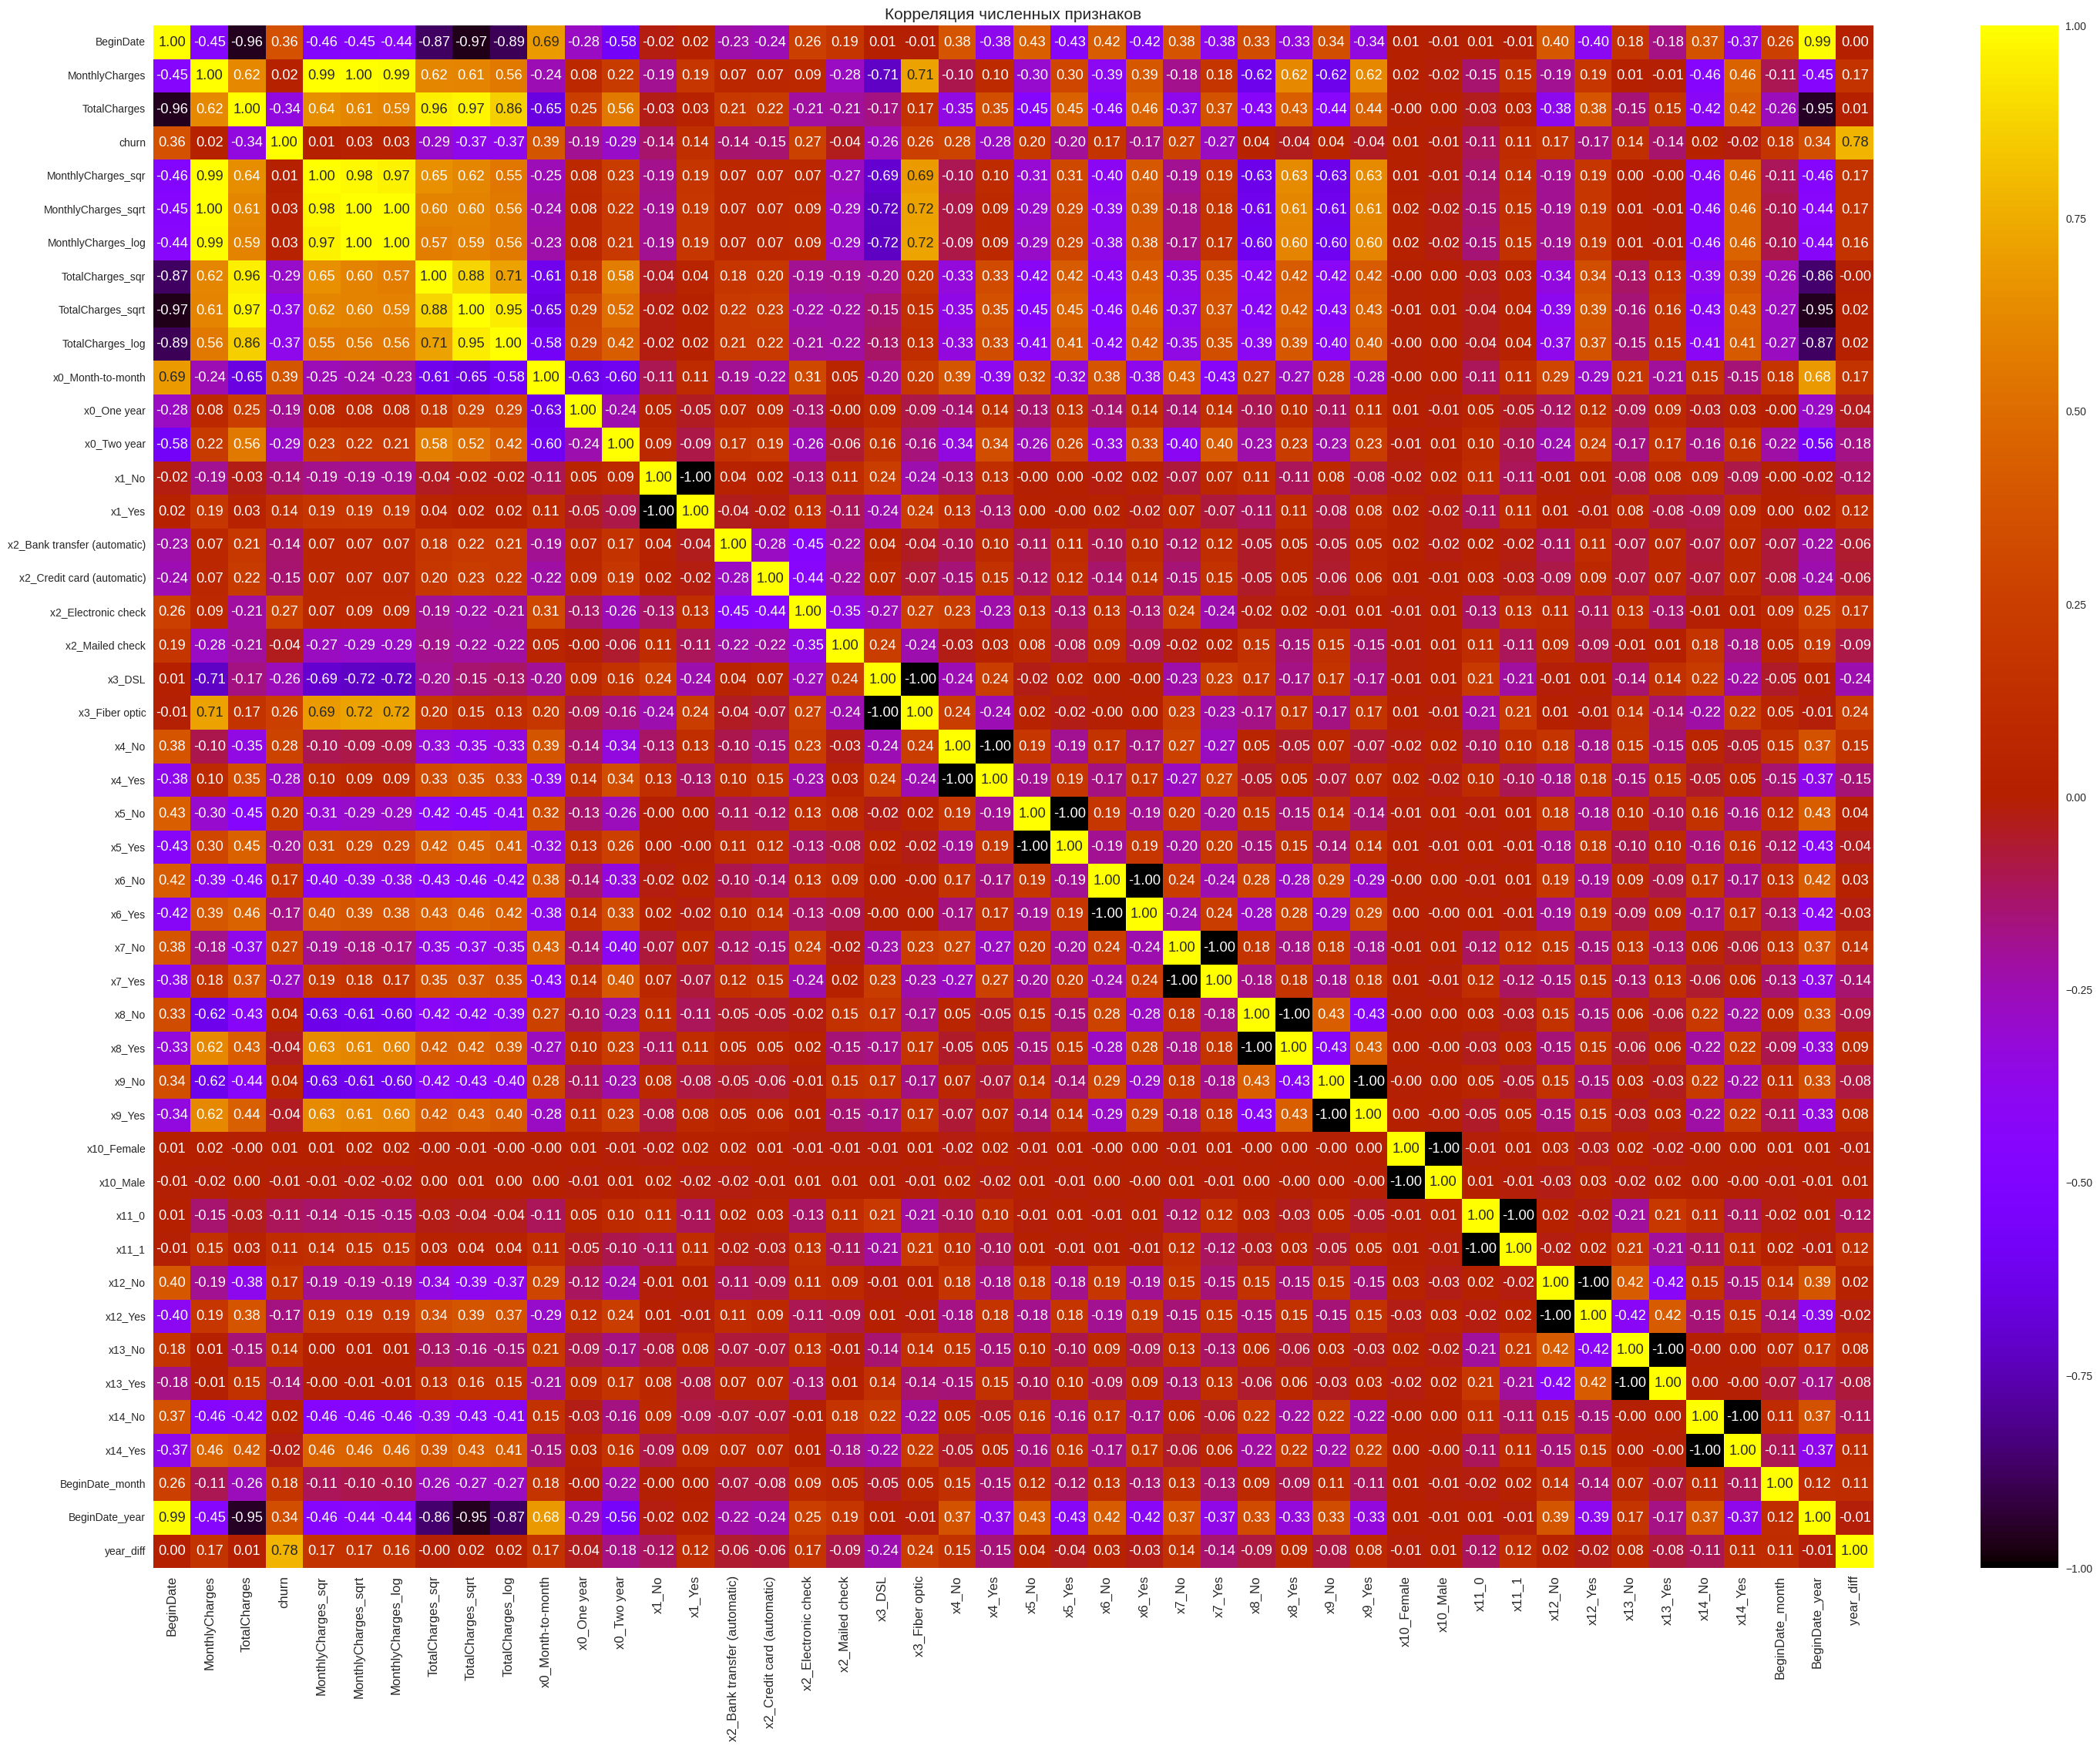

In [248]:
numerical_columns = [
   'BeginDate', 'MonthlyCharges', 'TotalCharges', 'churn', 'MonthlyCharges_sqr', 'MonthlyCharges_sqrt',
'MonthlyCharges_log', 'TotalCharges_sqr', 'TotalCharges_sqrt', 'TotalCharges_log', 'x0_Month-to-month', 
'x0_One year', 'x0_Two year', 'x1_No', 'x1_Yes', 'x2_Bank transfer (automatic)', 'x2_Credit card (automatic)', 
'x2_Electronic check', 'x2_Mailed check', 'x3_DSL','x3_Fiber optic', 'x4_No', 'x4_Yes', 'x5_No', 
'x5_Yes', 'x6_No', 'x6_Yes', 'x7_No', 'x7_Yes', 'x8_No', 'x8_Yes', 'x9_No', 'x9_Yes', 'x10_Female', 
'x10_Male', 'x11_0', 'x11_1', 'x12_No', 'x12_Yes', 'x13_No', 'x13_Yes', 'x14_No', 'x14_Yes', 
'BeginDate_month', 'BeginDate_year', 'year_diff']

plt.figure(figsize=(36,26))
sns.heatmap(df2[numerical_columns].corr(), annot=True, fmt='0.2f', cmap= 'gnuplot')
plt.title('Корреляция численных признаков');

In [287]:
train_no_target=df2.drop(['churn', 'year_diff', 'BeginDate'], axis=1)
X=train_no_target
y=df2['churn']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40, stratify=y)

In [288]:
X=X.dropna(how='all') 
y=y.dropna(how='all') 


## Нормализация данных


pd.options.display.float_format = '{:.2f}'.format
x_train.describe()

# еще одна нормализация - это min-max нормализация значения [0;1]
from sklearn.preprocessing import MinMaxScaler

# fit скейлера проводить только на трейне Х
minmax_data=x_train[['TotalCharges_sqr', 'TotalCharges', 'MonthlyCharges']]
mm_scaler = MinMaxScaler()
mm_scaler.fit(minmax_data)

# transform проводится на x_train, x_test
mm_scaled = mm_scaler.transform(minmax_data)

x_train[['TotalCharges_sqr_minmax', 'TotalCharges_minmax', 'MonthlyCharges_minmax']] = mm_scaled

x_train[['TotalCharges_sqr_minmax', 'TotalCharges_minmax', 'MonthlyCharges_minmax', 
         'TotalCharges_sqr', 'TotalCharges', 'MonthlyCharges']].describe()

x_train=x_train.drop(['MonthlyCharges', 'TotalCharges', 'TotalCharges_sqr'], axis=1)

# Baseline model

In [279]:
from sklearn.dummy import DummyClassifier
# Обучим базовую модель 
baseline = DummyClassifier(strategy='constant', constant=0)
baseline.fit(x_train, y_train)

# И получим её метрики
print('roc_auc_score = ', roc_auc_score(y, baseline.predict(X)))

roc_auc_score =  0.5


# DecisionTreeClassifier model Дерево решений

In [280]:
from sklearn.model_selection import cross_val_score
tree = DecisionTreeClassifier(random_state=128)
tree.fit(x_train, y_train);
print('roc_auc_score = ', roc_auc_score(y_train, tree.predict(x_train)))
print(cross_val_score(tree, x_train, y_train, scoring="roc_auc", cv = 5))

roc_auc_score =  1.0
[0.72519026 0.72401826 0.74389046 0.75957178 0.74393602]


# MLPClassifier model нейронки

In [281]:
mlp = MLPClassifier((32,), random_state=128)
mlp.fit(x_train, y_train);
print('roc_auc_score = ', roc_auc_score(y_train, mlp.predict(x_train)))
print(cross_val_score(mlp, x_train, y_train, scoring="roc_auc", cv = 5))

roc_auc_score =  0.5231109603332676
[0.78234399 0.74005074 0.80891881 0.82056084 0.79216441]


# RandomForestClassifier model случайный лес

In [282]:
forest = RandomForestClassifier(random_state=128)
forest.fit(x_train, y_train);
print('roc_auc_score = ', roc_auc_score(y_train, forest.predict(x_train)))
print(cross_val_score(forest, x_train, y_train, scoring="roc_auc", cv = 5))

roc_auc_score =  1.0
[0.82835109 0.85877727 0.84280725 0.87519235 0.84846629]


# LGBMClassifier Model это фреймворк, который предоставляет реализацию деревьев принятия решений с градиентным бустингом

In [289]:
lightgbm = LGBMClassifier(random_state=128)
lightgbm.fit(x_train, y_train)
print('roc_auc_score = ', roc_auc_score(y_train, lightgbm.predict(x_train)))
print(cross_val_score(lightgbm, x_train, y_train, scoring="roc_auc", cv = 5))

roc_auc_score =  0.9377275347093028
[0.87319127 0.88055809 0.8920328  0.91333266 0.89792468]


# Оптимизация модели
Лучшей моделью является LGBMClassifier по следующим причинам:

Один из лучших показателей roc_auc. Быстрое обучение. Модель интерпретируема, то есть можно получить показатели важности признаков. Может предсказывать вероятность класса. Оптимизация модели и конвейера по подготовке данных проводится с помощью байесовской оптимизации. При разных гиперпараметрах модель обучается на тренировочных данных, а оценивается на валидационных.


In [290]:
def optimize_lightgbm(
    rare_encoder_tol: float, 
    constant_dropper_tol: float, 
    correlated_dropper_threshold: float, 
    n_estimators: float, 
    learning_rate: float, 
    reg_lambda: float, 
    num_leaves: float, 
    reg_alpha: float, 
    boosting_type: str = 'goss'
) -> float:
    """Используется Баейсовским оптимизатором для поиска лучших гиперпараметров 
    конвейера по подготовке данных и модели LGBMClassifier.
    """
    
    # Создадим конвейер с заданными гиперпараметрами
    model = Pipeline(steps=[
        # Преобразования численных переменных
        ('normalization', YeoJohnsonTransformer()), 
        ('outlier_remover', Winsorizer()), 
        ('scaler', SklearnTransformerWrapper(StandardScaler())), 
        
        # Удаление дубликатов и коррелируемых признаков
        ('constant_dropper', DropConstantFeatures(tol=constant_dropper_tol)), 
        ('duplicated_dropper', DropDuplicateFeatures()), 
        ('correlated_dropper', DropCorrelatedFeatures(
            threshold=correlated_dropper_threshold)), 
        # Лучшая модель с оптимизированными гиперпараметрами
        ('model', LGBMClassifier(
            n_estimators=int(n_estimators), boosting_type=boosting_type, 
            learning_rate=learning_rate, num_leaves=int(num_leaves), 
            reg_lambda=reg_lambda, reg_alpha=reg_alpha, 
            random_state=128))])
    
    # Обучим и оценим модель
    model.fit(x_train, y_train)
    prediction = model.predict_proba(x_test)[:, 1]
    return roc_auc_score(y_test, prediction)

In [291]:
optimizing_parameters = {
    'rare_encoder_tol': (0.01, 0.1), 
    'constant_dropper_tol': (0.95, 0.999), 
    'correlated_dropper_threshold': (0.7, 0.99), 
    'n_estimators': (50, 5000), 
    'learning_rate': (0.01, 0.25), 
    'reg_lambda': (0, 50), 
    'num_leaves': (10, 120), 
    'reg_alpha': (0, 50)}

In [293]:
# байесовский оптимизатор не работает с категориальными значениями, поэтому для 
# каждого типа бустинга будет проводится своя оптимизация гиперпараметров

best_score, best_parameters = 0.0, dict()
for boosting_type in ('gbdt', 'goss'):

    print(f'boosting_type = {boosting_type}')
    optimizer = BayesianOptimization(
        partial(optimize_lightgbm, boosting_type=boosting_type), 
        optimizing_parameters, random_state=128)
    optimizer.maximize(init_points=2, n_iter=5)
    
    if best_score < optimizer.max['target']:
        best_score = optimizer.max['target']
        best_parameters.update(optimizer.max['params'])
        best_parameters['boosting_type'] = boosting_type

boosting_type = gbdt
|   iter    |  target   | consta... | correl... | learni... | n_esti... | num_le... | rare_e... | reg_alpha | reg_la... |
-------------------------------------------------------------------------------------------------------------------------
| 1         | 0.8303    | 0.9925    | 0.7763    | 0.04154   | 255.9     | 36.28     | 0.06809   | 39.53     | 30.07     |
| 2         | 0.8482    | 0.9664    | 0.7346    | 0.08419   | 593.1     | 76.23     | 0.03262   | 14.98     | 25.86     |
| 3         | 0.8495    | 0.9605    | 0.8489    | 0.02914   | 597.5     | 61.83     | 0.0384    | 14.45     | 34.61     |
| 4         | 0.8797    | 0.9949    | 0.9206    | 0.1122    | 787.1     | 30.54     | 0.03032   | 0.7925    | 48.2      |
| 5         | 0.8669    | 0.9542    | 0.7811    | 0.01519   | 1.01e+03  | 14.17     | 0.09951   | 1.97      | 45.6      |
| 6         | 0.8216    | 0.999     | 0.7       | 0.25      | 867.2     | 120.0     | 0.01      | 50.0      | 0.0       |
| 7

# Запуск модели с лучшими параметрами LGBMClassifier

In [294]:
final_pipeline = Pipeline(steps=[

    
        
    # Создание дополнительных признаков и
    # Преобразования численных переменных
    ('normalization', YeoJohnsonTransformer()), 
    ('outlier_remover', Winsorizer()), 
    ('scaler', SklearnTransformerWrapper(StandardScaler())), 


    # Удаление дубликатов и коррелируемых признаков
    ('constant_dropper', DropConstantFeatures(tol=0.9711)), 
    ('duplicated_dropper', DropDuplicateFeatures()), 
    ('correlated_dropper', DropCorrelatedFeatures(threshold=0.9886)), 

    # Лучшая модель с оптимизированными гиперпараметрами
    ('model', LGBMClassifier(
        random_state=128, learning_rate=0.1239, boosting_type='goss', 
        n_estimators=882, reg_lambda=5.8, reg_alpha=35.45, num_leaves=119)), 
    
])

Метрики модели Для оценки метрик модели обучим её на объектах тренировочной и тествоой выборках и сделаем предсказания на тестовых данных.

Целевая метрика roc-auc=0.87 высокая, у модели наблюдается совсем небольшое переобучение.

In [295]:
final_model=final_pipeline.fit(X, y)

In [296]:
print(cross_val_score(final_pipeline, X, y, scoring="roc_auc", cv = 5))

[0.89587674 0.87437248 0.86932258 0.860076   0.86322196]


In [297]:
print(cross_val_score(final_model, x_test, y_test, scoring="roc_auc", cv = 5))

[0.8568515  0.7964392  0.84092162 0.83426535 0.81261082]


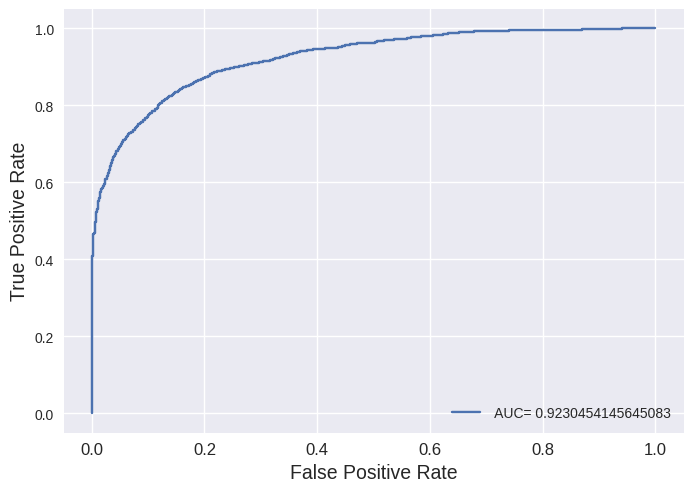

In [299]:
from sklearn import metrics
from matplotlib import pyplot as plt


#define metrics
y_pred_proba = final_model. predict_proba (X)[::,1]
fpr, tpr, _ = metrics. roc_curve (y, y_pred_proba)
auc = metrics. roc_auc_score (y, y_pred_proba)

#create ROC curve
plt.plot (fpr,tpr,label=" AUC= "+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show() 

# Финальная модель

In [300]:
X_new=df2.drop(['churn', 'year_diff', 'BeginDate'], axis=1)
y_new=df2['churn']
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.3, random_state=40)

In [301]:
lightgbm_best = LGBMClassifier(random_state=128, learning_rate=0.1239, boosting_type='goss', 
        n_estimators=882, reg_lambda=5/8, reg_alpha=35.45, num_leaves=119)
lightgbm_best.fit(x_train_new, y_train_new)
# сделать предикт на тренировочных параметрах и выполнить оценку точности
pred_train = lightgbm_best.predict(x_train_new)
roc_auc_score(y_train_new, pred_train)
# сделать предикт на тестовых параметрах и выполнить оценку точности
pred_test = lightgbm_best.predict(x_test_new)
roc_auc_score(y_test_new, pred_test)
print('точность тренировочной выборки =', roc_auc_score(y_train_new, pred_train))
print('точность тестовой выборки =', roc_auc_score(y_test_new, pred_test))

точность тренировочной выборки = 0.8116841805328341
точность тестовой выборки = 0.750614934493294


# Анализ влияния feauture на результаты моделирования

In [302]:
# выведем features и отсортируем по убыванию, чтобы понять, какие фичи вносят больший результат
lightgbm_best.feature_importances_
f_imp_list = list(zip(X.columns, lightgbm_best.feature_importances_))
f_imp_list.sort(key = lambda x: x[1], reverse=True)
f_imp_list=pd.DataFrame({"features": X.columns, "feature_importances": lightgbm_best.feature_importances_})
f_imp_list['feature_importances'].describe()

count    43.00
mean     76.02
std     198.20
min       0.00
25%       0.00
50%      26.00
75%      42.00
max     894.00
Name: feature_importances, dtype: float64

In [303]:
# обрежем features, которые имеют вклад 0 в модель, осталось 112 features 
f_imp_list_cut = f_imp_list.loc[f_imp_list['feature_importances']>0, :]
f_imp_list_cut['feature_importances'].describe()

count    24.00
mean    136.21
std     251.36
min      15.00
25%      37.50
50%      41.50
75%      47.25
max     894.00
Name: feature_importances, dtype: float64

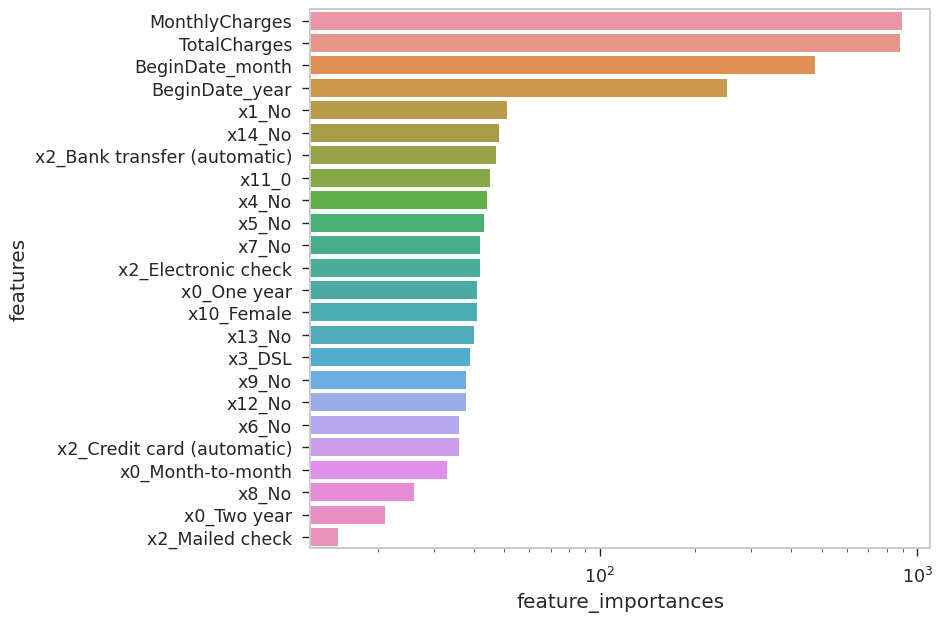

<Figure size 800x700 with 0 Axes>

In [304]:
## Выведем фичи, значения которых максимально вносят вклад в модель, логично, что это все revenue

from jupyterthemes import jtplot

jtplot.style(context='notebook', ticks=True, grid=False)
f_imp_list_cut = f_imp_list_cut.sort_values('feature_importances', ascending=False) 
sns.barplot(f_imp_list_cut['feature_importances'], f_imp_list_cut['features']).set(xscale="log")  
plt.figure()  
plt.show() 
sns.set (font_scale=0.04)

# Выводы


Задача проекта выявить отток клиентов
Решение
Расчитаны модели 
DecisionTreeClassifier model Дерево решений  [0.72519026 0.72401826 0.74389046 0.75957178 0.74393602]
MLPClassifier model нейронки  [0.78234399 0.74005074 0.80891881 0.82056084 0.79216441]
RandomForestClassifier model случайный лес [0.82835109 0.85877727 0.84280725 0.87519235 0.84846629]
LGBMClassifier Model это фреймворк, который предоставляет реализацию деревьев принятия решений с градиентным бустингом [0.87319127 0.88055809 0.8920328  0.91333266 0.89792468]

в итоге метод LGBMClassifier показал более высокие roc_auc
после детальной настройки модели выбраны оптимальные параметры
lightgbm_best = LGBMClassifier(random_state=128, learning_rate=0.1239, boosting_type='goss', 
        n_estimators=882, reg_lambda=5/8, reg_alpha=35.45, num_leaves=119)
        
посчитана модель на train test и на общем датасет
на общем датасет roc_auc [0.8568515  0.7964392  0.84092162 0.83426535 0.81261082]


произведен анализ влияния фич и убраны те, что имеют 0 веса (убрали 19 фич. было 43 стало 24 фич)
показан график влияния фич на модель - это параметры Monthly Charge, Total Charge


Ответ на вопрос, задача выявить отток клиентов. 
Когда будут появляться новые данные, мы сможем прогнозировать при входных данных, которые есть, какие клиенты могут потенциально уйти, с вероятностью  [0.8568515  0.7964392  0.84092162 0.83426535 0.81261082] 